In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
df=pd.read_csv('Salary_dataset.csv')
X=df[['Yearsofexp']]
y=df.Salary

In [6]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [18]:
X_st = scaler_X.fit_transform(X)
y_reshaped = y.values.reshape(-1, 1)
y_st = scaler_y.fit_transform(y_reshaped)

In [8]:
reg1 = LinearRegression()
reg1.fit(X_st, y_st)

LinearRegression()

In [9]:
y_pred1 = reg1.predict(X_st)

In [10]:
y_pred_original = scaler_y.inverse_transform(y_pred1)

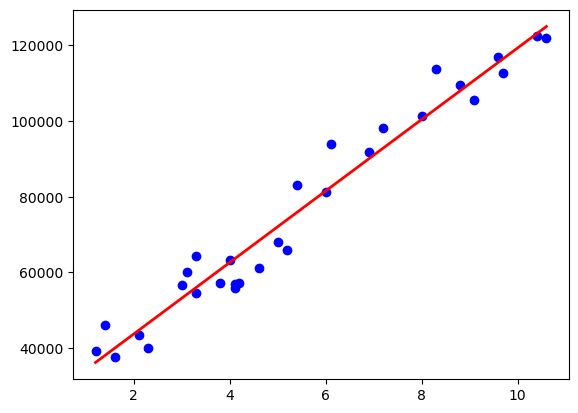

In [11]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_original, color='red', linewidth=2, label='Regression Line')

In [12]:
new_experience = np.array([[7]])
new_experience_st = scaler_X.transform(new_experience)
predicted_salary_st = reg1.predict(new_experience_st)
predicted_salary = scaler_y.inverse_transform(predicted_salary_st)
print(f'Predicted salary for {new_experience[0][0]} years of experience: ${predicted_salary[0][0]:.2f}')

Predicted salary for 7 years of experience: $90997.94


c:\Users\sweth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
coefficients_st = reg1.coef_.flatten()  # Standardized coefficients
intercept_st = reg1.intercept_[0]   

In [15]:
std_X = scaler_X.scale_
std_y = scaler_y.scale_[0]

# Means of features and target
mean_X = scaler_X.mean_
mean_y = scaler_y.mean_[0]


In [16]:
coefficients = coefficients_st * (std_y / std_X)  
intercept = (intercept_st * std_y) + mean_y - (coefficients @ mean_X)
print(f'Destandardized Coefficients: {coefficients}')
print(f'Destandardized Intercept: {intercept}')

Destandardized Coefficients: [9449.96232146]
Destandardized Intercept: 24848.203966523186
